<a href="https://colab.research.google.com/github/egordenisov/capon/blob/main/capon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключаем нужные библиотеки

In [32]:
import numpy as np


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Загружаем файлы с данными c bitbucket

In [18]:
!wget https://bitbucket.org/sirazievlenar/signal-processing/raw/51c9ba15ca5e386fc1d6ec068e990ef77184c45a/capon.npy
!wget https://bitbucket.org/sirazievlenar/signal-processing/raw/51c9ba15ca5e386fc1d6ec068e990ef77184c45a/rcvr_pos.npy

--2020-12-23 01:43:04--  https://bitbucket.org/sirazievlenar/signal-processing/raw/51c9ba15ca5e386fc1d6ec068e990ef77184c45a/capon.npy
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::3403:4be7, 2406:da00:ff00::22c0:3470, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1611344 (1.5M) [application/octet-stream]
Saving to: ‘capon.npy’

capon.npy           100%[===================>]   1.54M  1.66MB/s    in 0.9s    

2020-12-23 01:43:05 (1.66 MB/s) - ‘capon.npy’ saved [1611344/1611344]

--2020-12-23 01:43:06--  https://bitbucket.org/sirazievlenar/signal-processing/raw/51c9ba15ca5e386fc1d6ec068e990ef77184c45a/rcvr_pos.npy
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00::22e9:9f55, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4952 (4.8K) [ap

In [ ]:
Считываем данные из файлов

In [77]:
Y = np.load('capon.npy')
AA = np.load('rcvr_pos.npy')

Определим размеры массивов входных данных

In [78]:
Y.shape

(201, 501)

In [79]:
AA.shape

(201, 3)

In [80]:
Иммем 201 антенну, 501 точку величины сигнала каждой антенны, координаты антенных решеток

SyntaxError: ignored

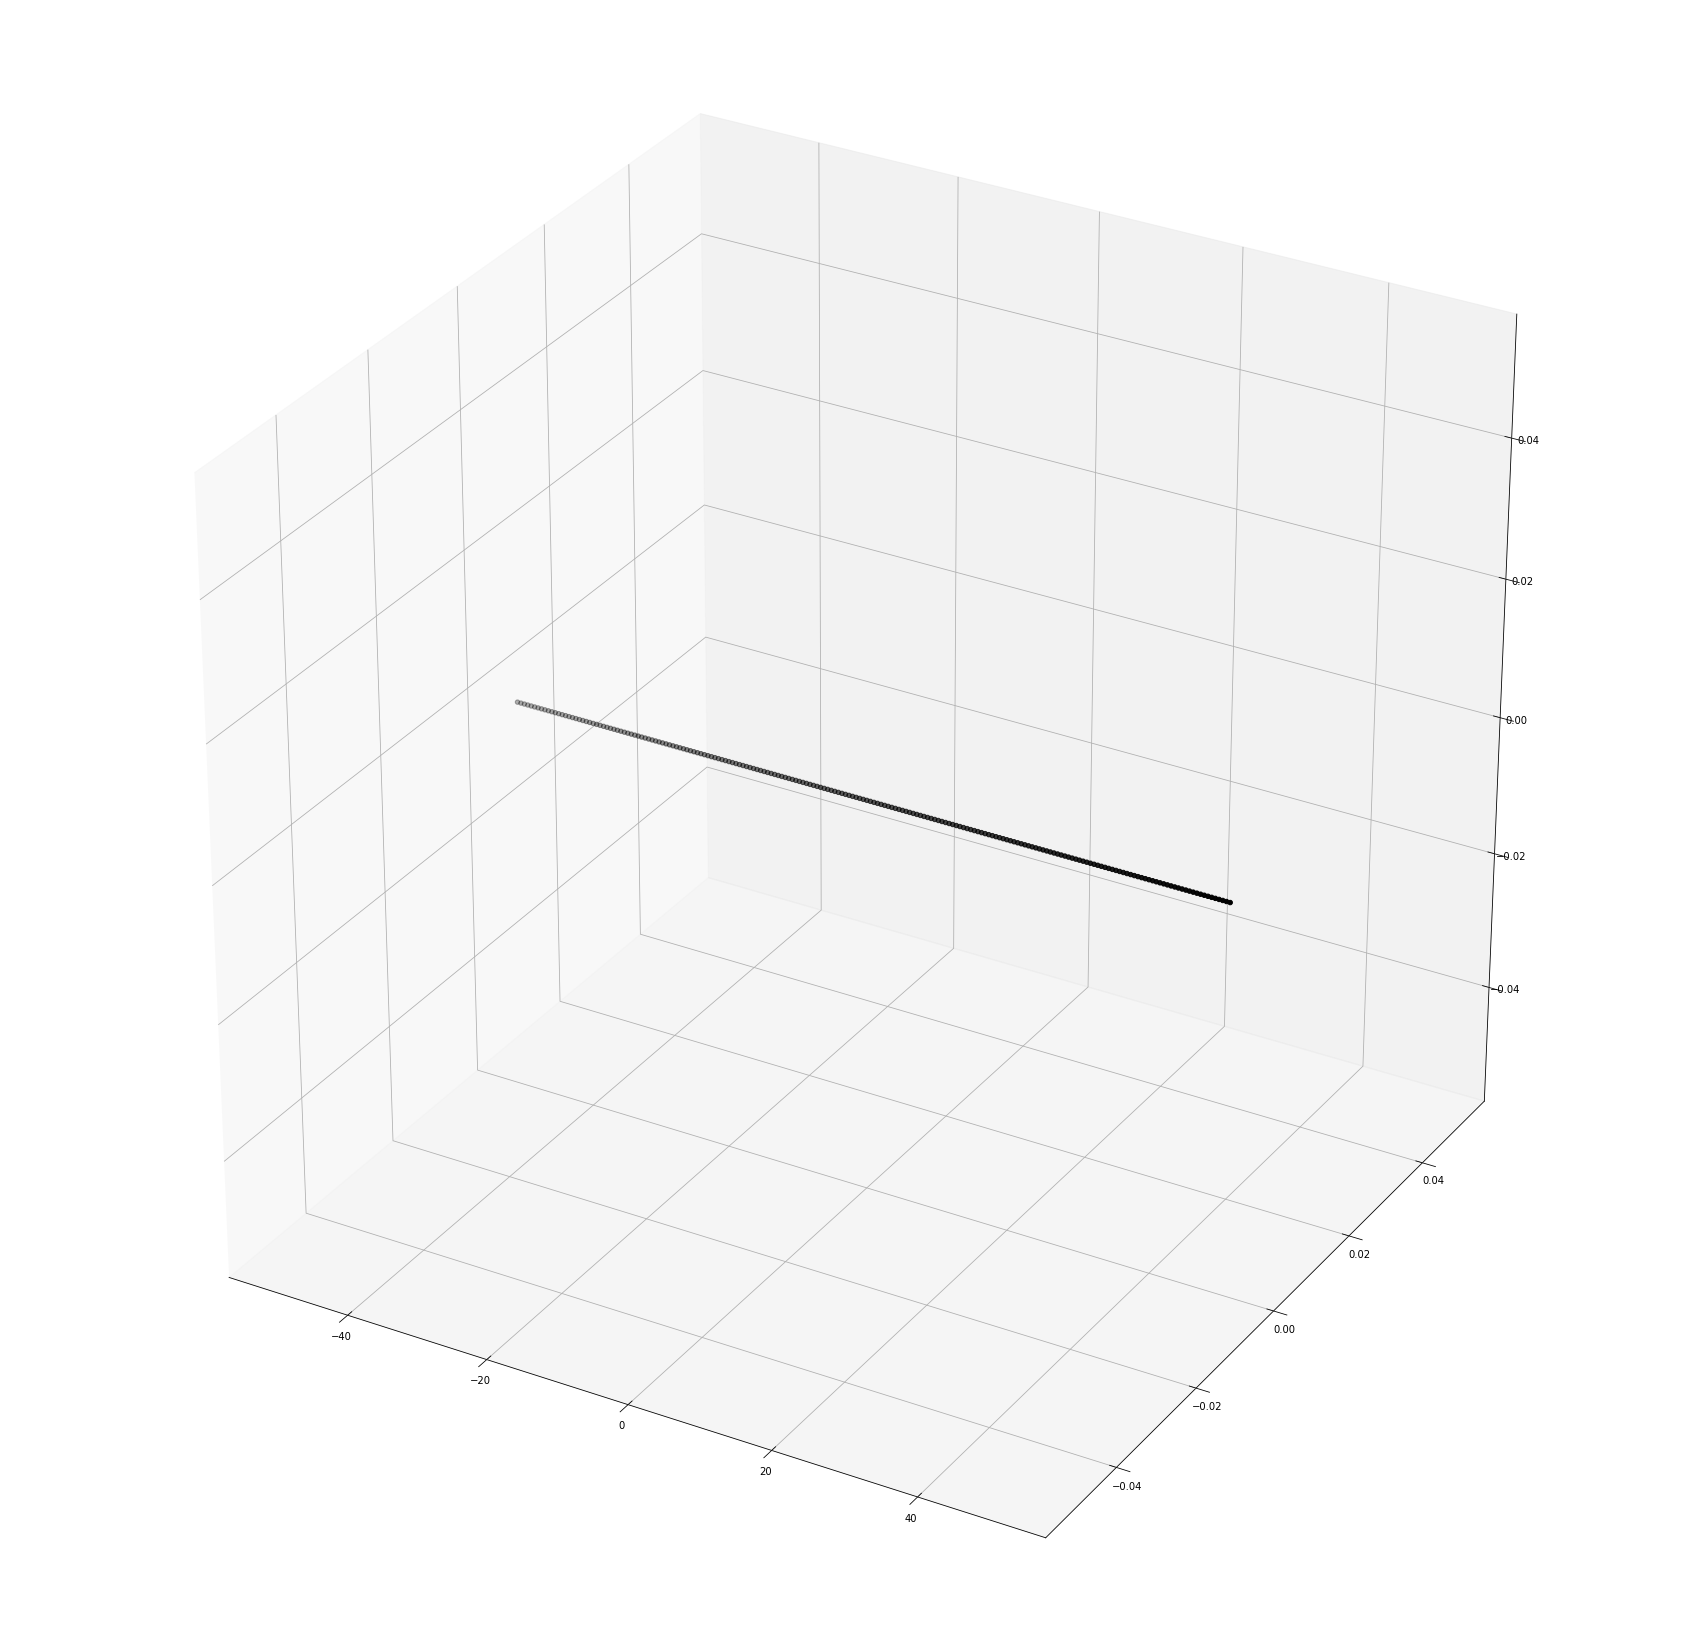

In [81]:
fig = plt.figure(figsize=(30, 30))
ax = plt.axes(projection="3d")

ax.scatter3D(AA[:,0], AA[:,1], AA[:,2], s=20, c='k');

plt.show()

Все антенны расположены линейно, выведем список координат x

In [82]:
AA[:,0]

array([-50. , -49.5, -49. , -48.5, -48. , -47.5, -47. , -46.5, -46. ,
       -45.5, -45. , -44.5, -44. , -43.5, -43. , -42.5, -42. , -41.5,
       -41. , -40.5, -40. , -39.5, -39. , -38.5, -38. , -37.5, -37. ,
       -36.5, -36. , -35.5, -35. , -34.5, -34. , -33.5, -33. , -32.5,
       -32. , -31.5, -31. , -30.5, -30. , -29.5, -29. , -28.5, -28. ,
       -27.5, -27. , -26.5, -26. , -25.5, -25. , -24.5, -24. , -23.5,
       -23. , -22.5, -22. , -21.5, -21. , -20.5, -20. , -19.5, -19. ,
       -18.5, -18. , -17.5, -17. , -16.5, -16. , -15.5, -15. , -14.5,
       -14. , -13.5, -13. , -12.5, -12. , -11.5, -11. , -10.5, -10. ,
        -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,  -5.5,
        -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,  -1. ,
        -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,
         4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,
         8.5,   9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,
        13. ,  13.5,

Антенны симметрично относительно нуля. Шаг 0.5

Теперь выведем вид сигнала с нулевой антенны. Сначала реальные данные, затем в более приятном виде

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


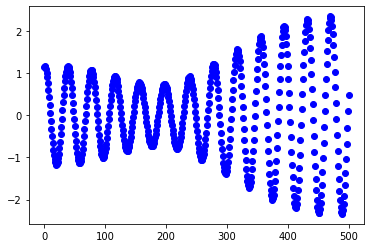

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


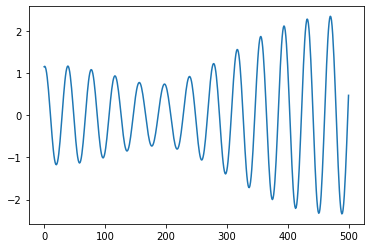

In [147]:
plt.plot(Y[0, :], 'bo')
plt.show()
plt.plot(Y[0, :])
plt.show()

Антенна поймала модулированную синусоиду.

Начинаем рассчеты и алгоритм Кейпона.

Считаем кореляционную матрицу, обратную к ней. 

In [88]:
R = np.dot( Y, Y.conjugate().T )
R_inv = np.linalg.inv(R)

тетта = 0. y = 0.

In [148]:
def CAPON(alpha_deg):
  alpha_rad = alpha_deg * np.pi / 180
  U = np.exp( - 2 * 1j * (AA[:,0]) * np.cos (alpha_rad))
  L = 1 / ( np.dot( np.dot (  U.conjugate().T  ,  R_inv),  U) )

  return L

In [149]:
L = np.array([CAPON(i) for i in range(180)])

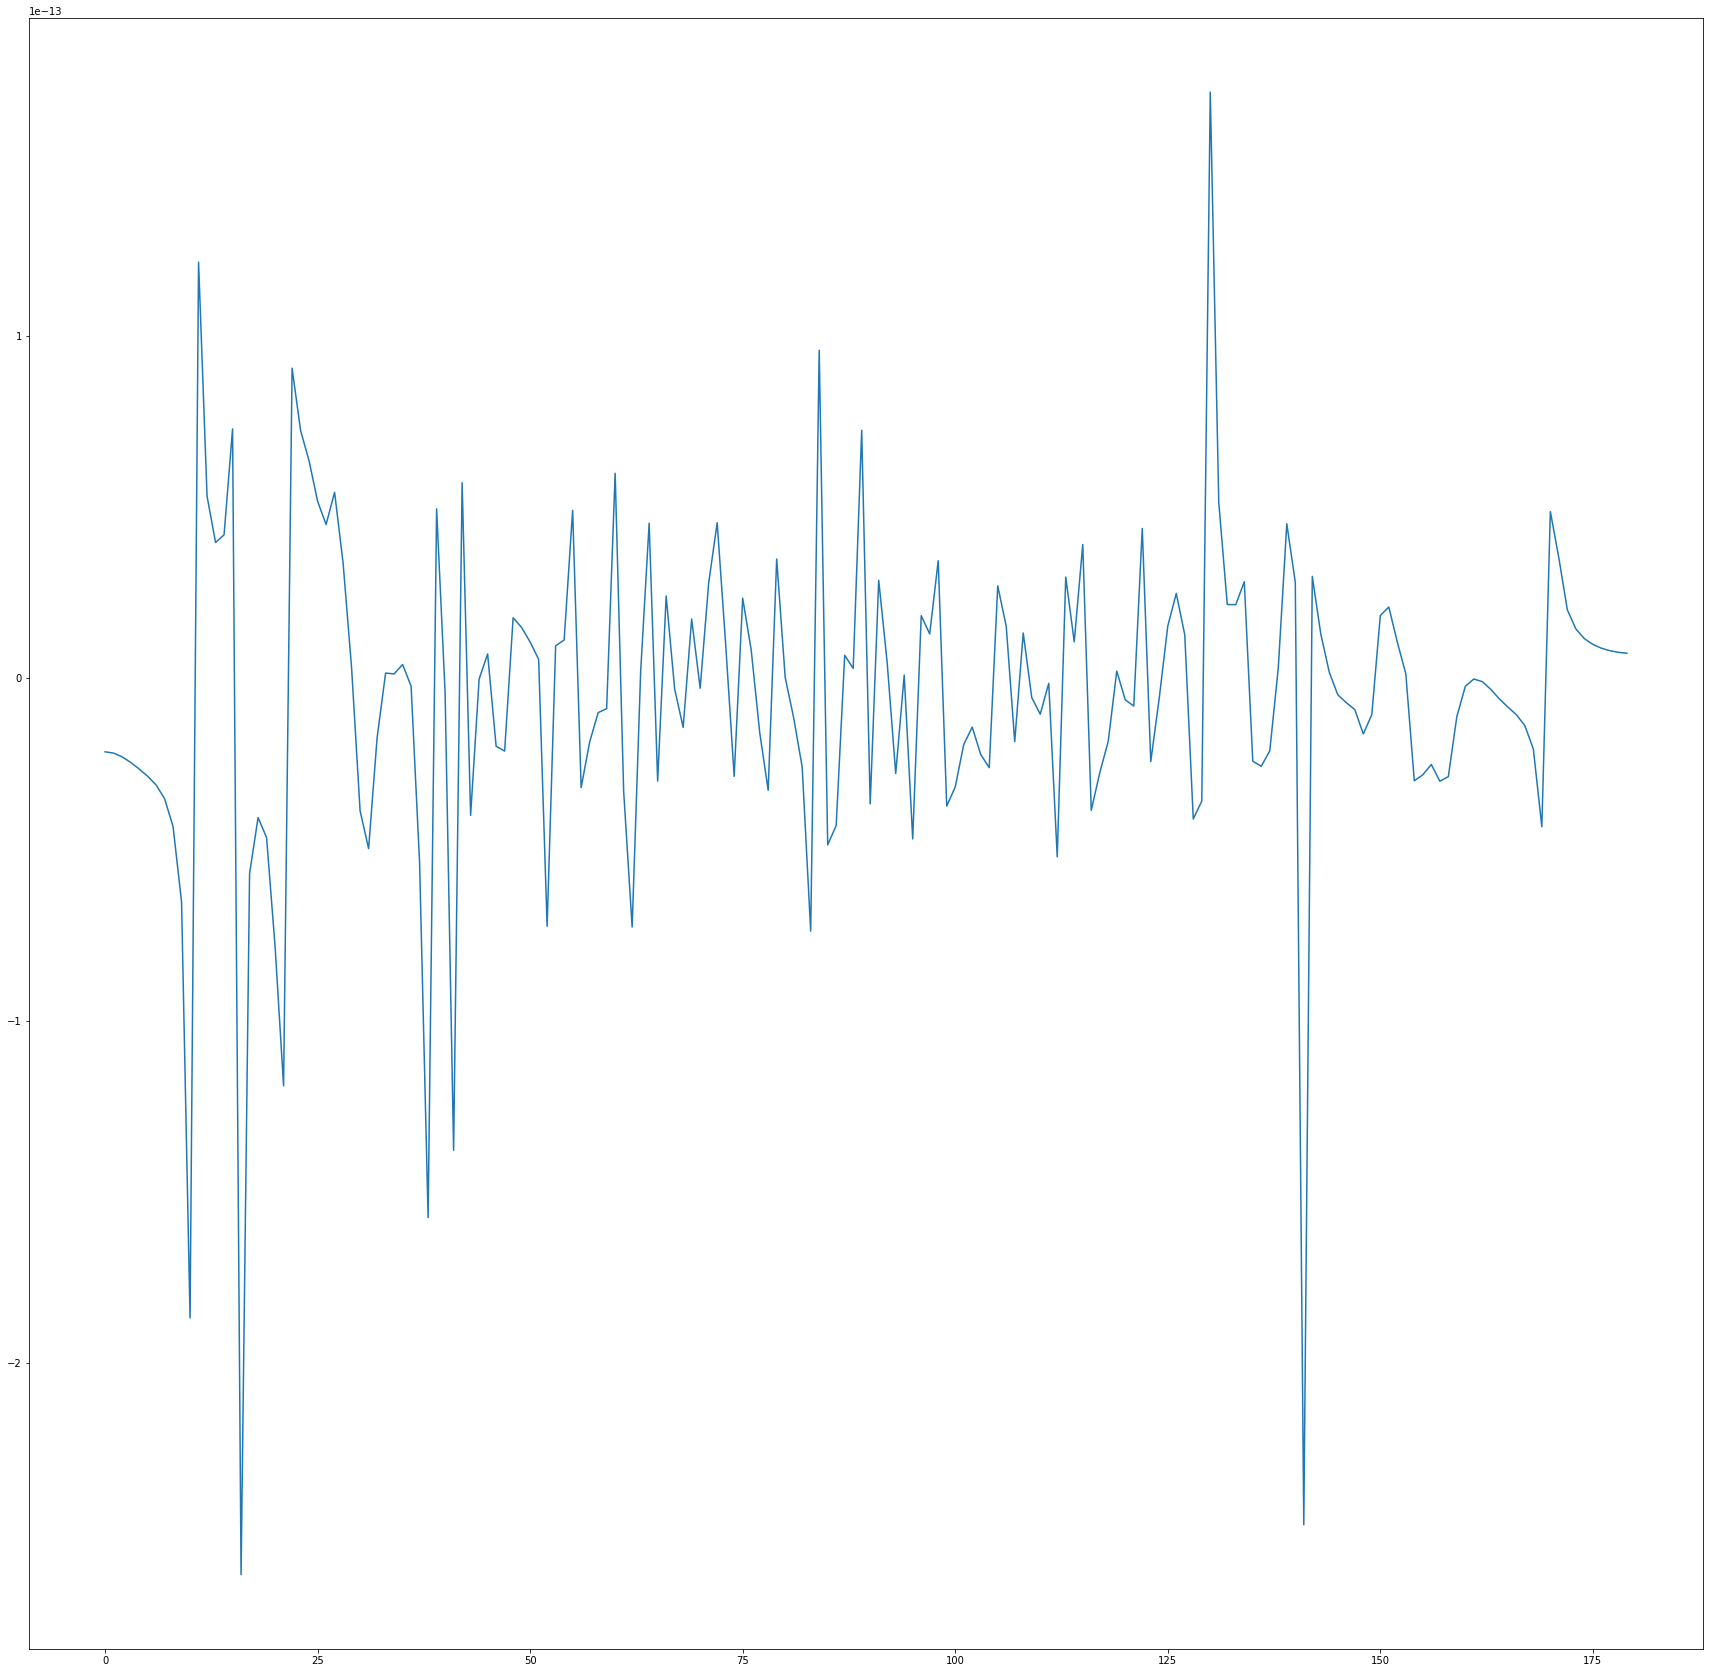

In [150]:
plt.figure(figsize=(30, 30))
plt.plot(L.real)
plt.show()